# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [1]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [3]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

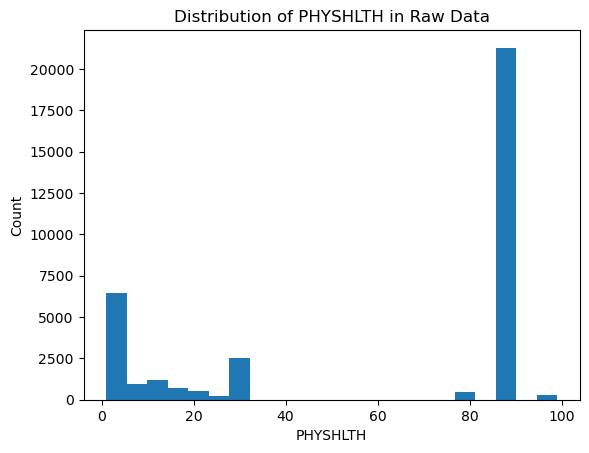

In [4]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [5]:
# Replace None with appropriate text
"""
The values on the x-axis (88, 77, and 99) do not accurately represent the intended data, which is the number of days with bad physical health out of the past 30 days
"""

'\nThe values on the x-axis (88, 77, and 99) do not accurately represent the intended data, which is the number of days with bad physical health out of the past 30 days\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [6]:
# Your code here
#Replacing 88 which represents None with Zero
df['PHYSHLTH'].replace(to_replace=88, value=0, inplace=True)
#Dropping rows with  77,99 and BLANK which are unnecesary in our question
df = df[~df['PHYSHLTH'].isin([77, 99, 'BLANK'])]

C:\Users\USER\AppData\Local\Temp\ipykernel_4064\2974658322.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PHYSHLTH'].replace(to_replace=88, value=0, inplace=True)


In [7]:
#Viewing all columns to see if the changes have been effected
pd.set_option('display.max_columns', 359)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Run the code below to ensure you have the correct, cleaned dataframe:

In [8]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [9]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

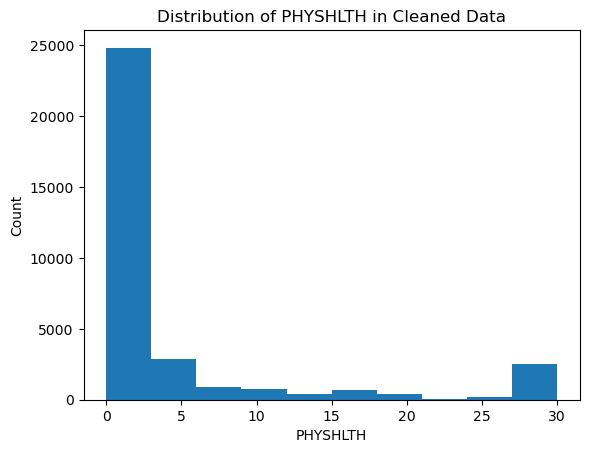

In [10]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [11]:
# Run this cell without changes
df["_STATE"].value_counts()

_STATE
36.0    11876
34.0    11458
9.0     10413
Name: count, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [12]:
# Your code here
# Replace state codes with state names
state_mapping = {
    9: 'Connecticut',
    34: 'New Jersey',
    36: 'New York'}
df.loc[:, '_STATE'] = df['_STATE'].replace(state_mapping)

C:\Users\USER\AppData\Local\Temp\ipykernel_4064\2447601461.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Connecticut' 'Connecticut' 'Connecticut' ... 'New York' 'New York'
 'New York']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, '_STATE'] = df['_STATE'].replace(state_mapping)


Below, we check the values:

In [13]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

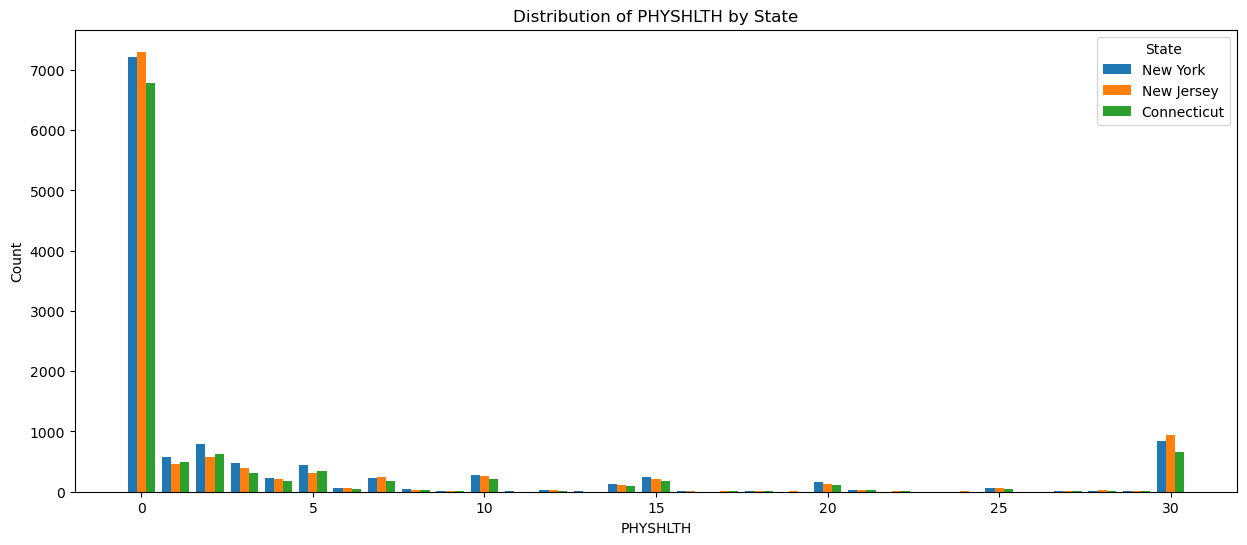

In [14]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [15]:
# Replace None with appropriate text
"""
The trends are similar in the different states as the as majority were not sick, distributions are similar accross states  for the various categories
"""

'\nThe trends are similar in the different states as the as majority were not sick, distributions are similar accross states  for the various categories\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [16]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [17]:
# Replace None with appropriate text
"""
The most appropriate statistical test for comparing the means of health days (PHYSHLTH) between the states (Connecticut, New Jersey, and New York) would be Analysis of Variance (ANOVA). Here's why ANOVA is suitable for this question:

Variables Being Compared:

Numeric Variable: PHYSHLTH (number of bad health days), which is continuous.
Categorical Variable: State (_STATE), which has three categories (Connecticut, New Jersey, New York).
Number of Categories:

There are three categories for the state variable: Connecticut, New Jersey, and New York.
Type of Analysis:

ANOVA is used to compare the means of a continuous variable across two or more categorical groups. In this case, we want to determine if there is a statistically significant difference in the mean number of bad health days (PHYSHLTH) among the three states.
Assumptions of ANOVA:
Normality: The data in each group should be approximately normally distributed. This assumption can be checked using statistical tests like the Shapiro-Wilk test or visual methods like Q-Q plots.
Homogeneity of Variances: The variances within each of the groups should be approximately equal. This can be tested using Levene's test, Bartlett's test, or by inspecting residual plots.
Independence of Observations: The samples must be independent of one another. This means the data from one group should not influence the data from another group.
Given these points, ANOVA is appropriate because it allows us to test whether the mean PHYSHLTH differs significantly among the states (Connecticut, New Jersey, New York). It will provide a statistical significance level (p-value) indicating whether any observed differences in means are likely due to true differences in the population or if they could have arisen by random chance.

Therefore, to determine if the difference in mean number of bad health days between Connecticut, New Jersey, and New York is statistically significant, you should conduct an ANOVA test on the PHYSHLTH variable across these three states.
"""

"\nThe most appropriate statistical test for comparing the means of health days (PHYSHLTH) between the states (Connecticut, New Jersey, and New York) would be Analysis of Variance (ANOVA). Here's why ANOVA is suitable for this question:\n\nVariables Being Compared:\n\nNumeric Variable: PHYSHLTH (number of bad health days), which is continuous.\nCategorical Variable: State (_STATE), which has three categories (Connecticut, New Jersey, New York).\nNumber of Categories:\n\nThere are three categories for the state variable: Connecticut, New Jersey, and New York.\nType of Analysis:\n\nANOVA is used to compare the means of a continuous variable across two or more categorical groups. In this case, we want to determine if there is a statistically significant difference in the mean number of bad health days (PHYSHLTH) among the three states.\nAssumptions of ANOVA:\nNormality: The data in each group should be approximately normally distributed. This assumption can be checked using statistical te

Now, identify the null and alternative hypotheses:

In [18]:
# Replace None with appropriate text
"""
H₀: μ_Connecticut = μ_New Jersey = μ_New York

H₁: At least one of μ_Connecticut, μ_New Jersey, or μ_New York is different
"""



'\nH₀: μ_Connecticut = μ_New Jersey = μ_New York\n\nH₁: At least one of μ_Connecticut, μ_New Jersey, or μ_New York is different\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [19]:
pip install statsmodels


In [20]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [21]:
# Replace None with appropriate text

"""
The p-value is 8.800607e-09
The calculated p-value is much smaller than the significance level (0.05) therefore we reject the null hypothesis
This means that there is a statistically significant difference in the mean number of bad health days (PHYSHLTH) among Connecticut, New Jersey, and New York


Meaning of the results:

The null hypothesis (H₀) was that the mean values of PHYSHLTH are the same across all states (Connecticut, New Jersey, New York).
The alternative hypothesis (H₁) is that at least one of the states has a mean PHYSHLTH value that is different.
Given the very small p-value, we have strong evidence to reject the null hypothesis, indicating that there are significant differences in the mean PHYSHLTH values among the states.
Recommendation to the business:
The results suggest that PHYSHLTH varies significantly by state. Therefore, state-specific factors might be influencing physical health.
Thus:
1.Investigate further into state-specific factors or conditions that might be affecting physical health, such as healthcare access, environmental factors, or socioeconomic conditions.
2.Develop tailored health interventions or programs that address the unique needs of each state.
3.Conduct further research to identify the exact causes of the differences in physical health between states.
Use these insights to inform policy decisions or allocate resources more effectively to improve physical health outcomes in states with poorer health indicators.
By focusing on state-specific interventions and addressing the unique challenges each state faces, the business can more effectively improve overall physical health outcomes.
"""

'\nThe p-value is 8.800607e-09\nThe calculated p-value is much smaller than the significance level (0.05) therefore we reject the null hypothesis\nThis means that there is a statistically significant difference in the mean number of bad health days (PHYSHLTH) among Connecticut, New Jersey, and New York\n\n\nMeaning of the results:\n\nThe null hypothesis (H₀) was that the mean values of PHYSHLTH are the same across all states (Connecticut, New Jersey, New York).\nThe alternative hypothesis (H₁) is that at least one of the states has a mean PHYSHLTH value that is different.\nGiven the very small p-value, we have strong evidence to reject the null hypothesis, indicating that there are significant differences in the mean PHYSHLTH values among the states.\nRecommendation to the business:\nThe results suggest that PHYSHLTH varies significantly by state. Therefore, state-specific factors might be influencing physical health.\nThus:\n1.Investigate further into state-specific factors or conditi

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [22]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: count, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [ ]:
#dropping the unnecessary rows
df = df[~df["RENTHOM1"].isin([3, 7, 9, 'BLANK'])]
#replacing the numeric codes with own and rent
df["RENTHOM1"].replace(to_replace=[1, 2], value=['Own', 'Rent'], inplace=True)

In [24]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
Own     21690
Rent    10244
Name: count, dtype: int64

Below, we check that this was done correctly:

In [25]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own','Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

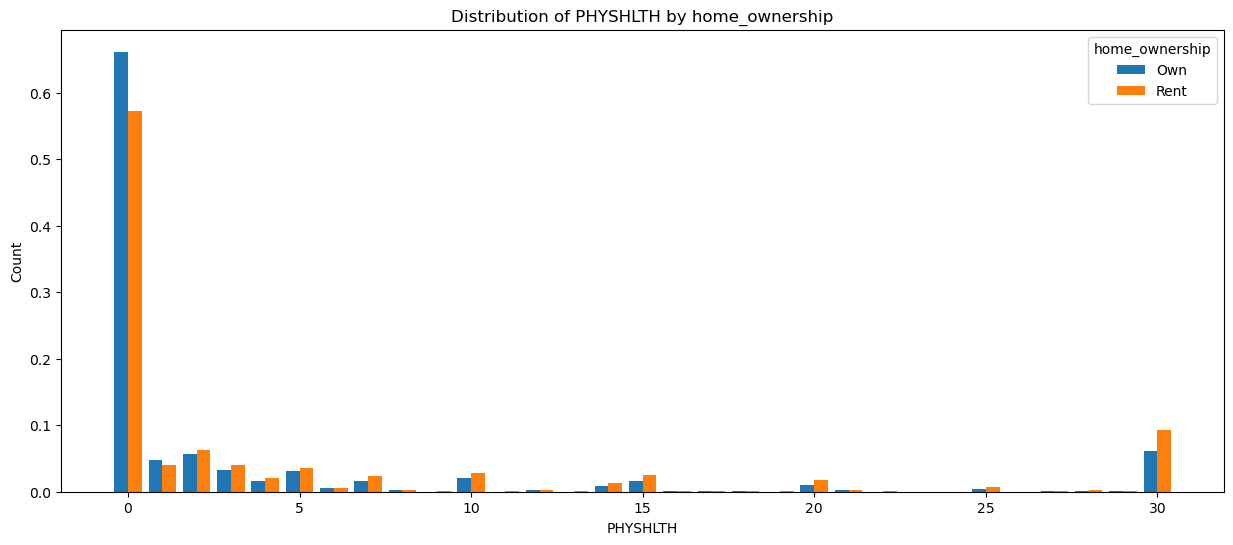

In [33]:
# Your code here
O = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
R = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[O ,R],
    label=["Own","Rent"],
    bins=range(32),
    align="left",
    density = True
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by home_ownership")

ax.legend(title="home_ownership");

Then run this code to find the averages:

In [34]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [28]:
# Replace None with appropriate text

"""

INTERPRETATION OF THE AVERAGES
Renters(Rent) have an average of 5.20 unhealthy days.
Homeowners(Own) have an average of 3.53 unhealthy days.
Those who rent have 1.67 more unhealthy days than homeowners (5.20 - 3.53 = 1.67).

Renters have a higher average that could be indicative of differences in lifestyle, 
economic status or access to healthcare.

COMPARISON TO STATE DISTRIBUTIONS
There's a significant variation in PHYSHLTH across different states 
implying that physical health varies significantly by state.
This suggests that the state of residence plays a crucial role in determining health outcomes.

BUSINESS RECOMMENDATION
Advocate for policies that support affordable housing and better living conditions for renters, which could potentially reduce the number of unhealthy days they experience.

"""


'\nNone\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [36]:
# Your code here (create additional cells as needed)
"""
TEST CHOICE
We will use a Two-sample t-test.
This is because we are comparing the means of two independent groups,
(renters and homeowners) inorder to determine if there is a significant difference in the number of unhealthy days.

H0: μrent = μown . There is no difference in the average number of unhealthy days between renters and homeowners
H0: μrent ≠ μown . There is a difference in the average number of unhealthy days between renters and homeowners
"""

'\nTEST CHOICE\nWe will use a Two-sample t-test.\nThis is because we are comparing the means of two independent groups,\n(renters and homeowners) inorder to determine if there is a significant difference in the number of unhealthy days.\n\nH0: μrent = μown . There is no difference in the average number of unhealthy days between renters and homeowners\nH0: μrent ≠ μown . There is a difference in the average number of unhealthy days between renters and homeowners\n'

In [37]:
import scipy.stats as stats

#Extract the PHYSHLTH values for owners and renters
O = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
R = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

#Perform the independent samples t-test
t_stat, p_value = stats.ttest_ind(O, R, equal_var=False)  # Use equal_var=False if variances are not assumed to be equal

#Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -15.480104856835828
P-value: 1.0789298641635188e-53


In [39]:
#Recomendation sfrom the outcome
""" 
The p-value(1.0789298641635651e-53) is less than the chosen significance level (0.05). 
We reject the null hypothesis. 
This indicates that there is a statistically significant difference in the mean number of bad health days between owners and renters
"""

' \nThe p-value(1.0789298641635651e-53) is less than the chosen significance level (0.05). \nWe reject the null hypothesis. \nThis indicates that there is a statistically significant difference in the mean number of bad health days between owners and renters\n'

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [40]:
# Your code here
# Define nicotine use based on the provided criteria
def determine_nicotine_use(row):
    if row['SMOKE100'] == 1 or row['USENOW3'] in [1, 2] or row['ECIGARET'] == 1:
        return 1
    else:
        return 0

# Create the NICOTINE_USE column
df['NICOTINE_USE'] = df.apply(determine_nicotine_use, axis=1)

# Verify the new column
print(df[['SMOKE100', 'USENOW3', 'ECIGARET', 'NICOTINE_USE']].head())

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

       SMOKE100  USENOW3  ECIGARET  NICOTINE_USE
49938       2.0      3.0       2.0             0
49939       2.0      3.0       2.0             0
49940       2.0      3.0       2.0             0
49941       2.0      3.0       2.0             0
49942       1.0      3.0       2.0             1


NICOTINE_USE
0    0.563036
1    0.436964
Name: proportion, dtype: float64

In [41]:

# Group data by nicotine use
nicotine_users = df[df['NICOTINE_USE'] == 1]['PHYSHLTH']
non_nicotine_users = df[df['NICOTINE_USE'] == 0]['PHYSHLTH']

# Perform t-test
t_stat, p_value = stats.ttest_ind(nicotine_users, non_nicotine_users, nan_policy='omit')

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: 16.184753177412006
P-value: 1.1068686551093399e-58


This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [42]:
# Your code here
df['CHRONIC'] = (df['PHYSHLTH'] >= 15).astype(int)

# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

CHRONIC
0    28246
1     3688
Name: count, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [43]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


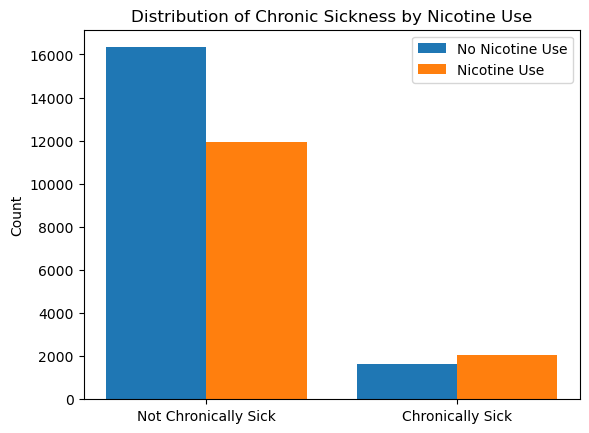

In [44]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [45]:
"""
TEST
The appropriate statistical test here is the Chi-Square Test of Independence.
This is because  we are comparing the proportion of individuals who are chronically sick (a categorical outcome) between two groups (nicotine users and non-users)

HYPOTHESES
Null Hypothesis (H0): 
There is no association between nicotine use and chronic sickness. The proportion of chronically sick individuals is the same for both nicotine users and non-users.
Alternative Hypothesis (H1): 
There is an association between nicotine use and chronic sickness. The proportion of chronically sick individuals differs between nicotine users and non-users
"""

'\nTEST\nThe appropriate statistical test here is the Chi-Square Test of Independence.\nThis is because  we are comparing the proportion of individuals who are chronically sick (a categorical outcome) between two groups (nicotine users and non-users)\n\nHYPOTHESES\nNull Hypothesis (H0): \nThere is no association between nicotine use and chronic sickness. The proportion of chronically sick individuals is the same for both nicotine users and non-users.\nAlternative Hypothesis (H1): \nThere is an association between nicotine use and chronic sickness. The proportion of chronically sick individuals differs between nicotine users and non-users\n'

In [49]:


import scipy.stats as stats

#Perform the Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

#Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

#Interpretation
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis. There is a significant association between nicotine use and chronic sickness.")
else:
    print("We fail to reject the null hypothesis. There is no significant association between nicotine use and chronic sickness.")

Chi-Square Statistic: 228.22648537455362
P-value: 1.4525226945056695e-51
We reject the null hypothesis. There is a significant association between nicotine use and chronic sickness.


## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [ ]:
# Your code here (create additional cells as needed)

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.